#### Seaborn
`Seaborn` is a special-purpose library for making attractive and informative statistical graphics in Python. It supports `numpy` and `pandas` data structures and statistical routines from `scipy` and `statsmodels`.

Install it via
    
    conda install seaborn
    
See also: http://stanford.edu/~mwaskom/software/seaborn/index.html.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
print(np.__version__, pd.__version__, sns.__version__)

# have these datasets available
iris, tips, titanic = map(sns.load_dataset, ['iris', 'tips', 'titanic'])

1.14.0 0.22.0 0.8.1


## Plotting bivariate distributions

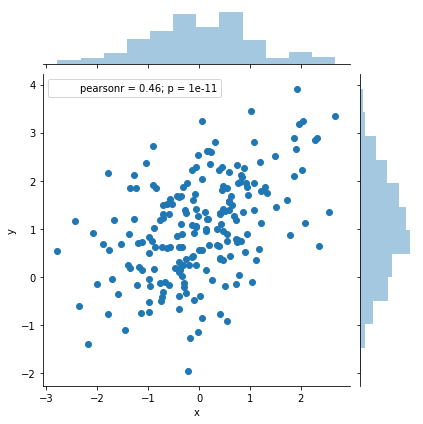

In [2]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);  # scatterplot

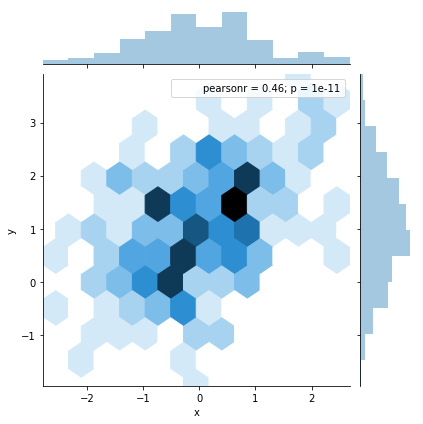

In [3]:
sns.jointplot(df.x, df.y, kind="hex");  # hexbin plot, x and y directly specified

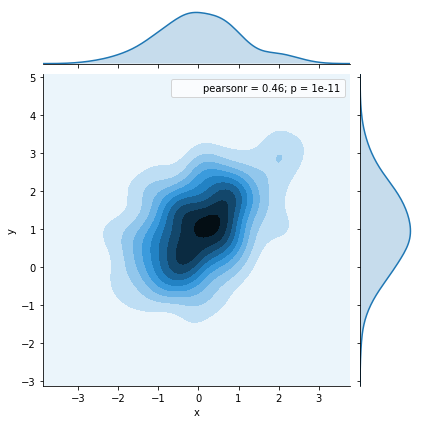

In [4]:
sns.jointplot(x="x", y="y", data=df, kind="kde");  # joint plot with kernel density estimation

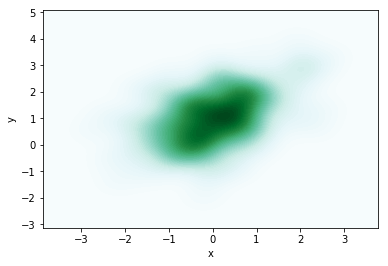

In [5]:
sns.kdeplot(df.x, df.y, n_levels=60, shade=True);  # just the kernel density with many contour levels

### Visualizing pairwise relationships in a dataset

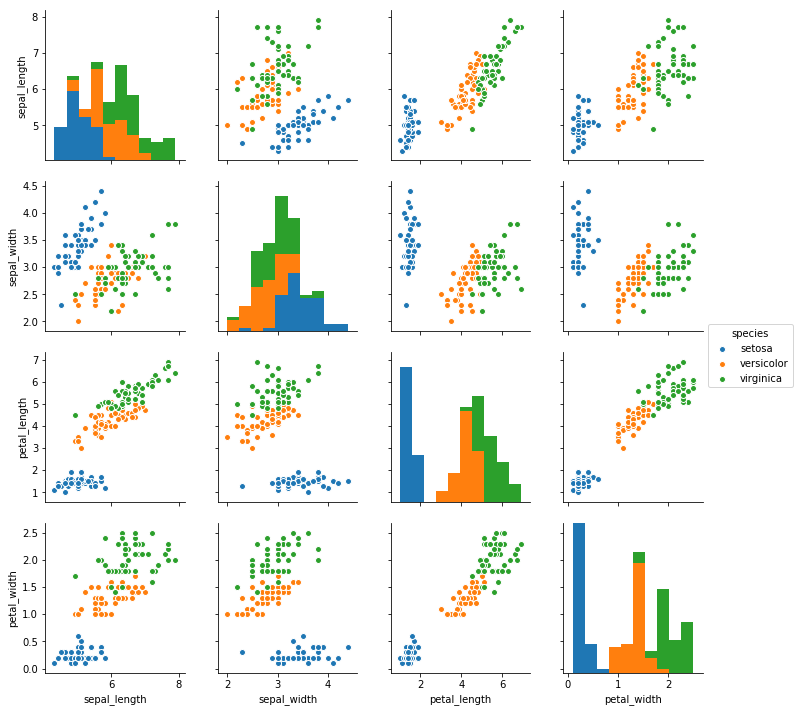

In [6]:
sns.pairplot(iris, hue="species");

## Visualizing linear relationships

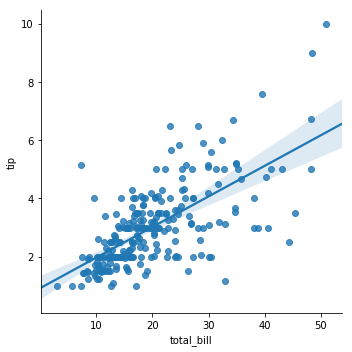

In [7]:
sns.lmplot(x="total_bill", y="tip", data=tips);  # fits "y ~ x" and then draws 95% confidence interval

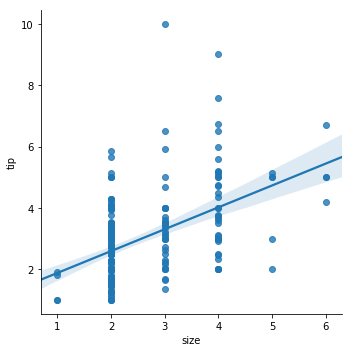

In [8]:
sns.lmplot(x="size", y="tip", data=tips);

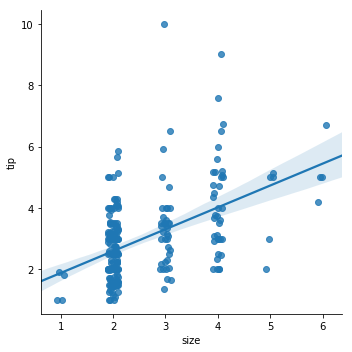

In [9]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.1);  # adding random noise to discrete x-values

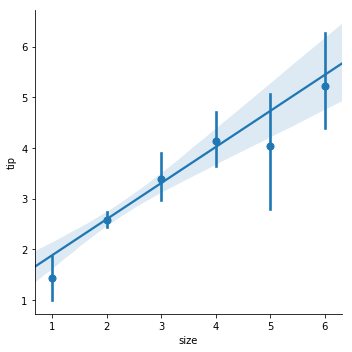

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);  # adding discrete mini-boxplots

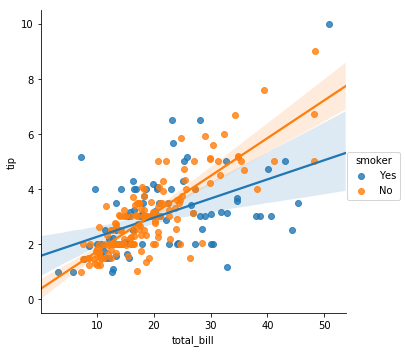

In [11]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

## Categorical data
### Distributions of observations within categories

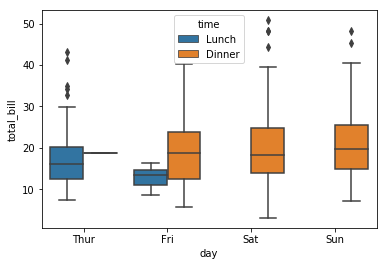

In [13]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

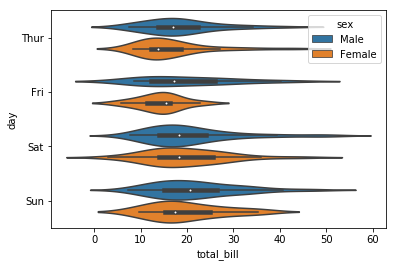

In [14]:
sns.violinplot(x="total_bill", y="day", hue="sex", data=tips);  # combines boxplot with kernel density estimation

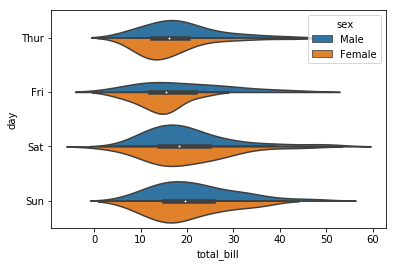

In [15]:
sns.violinplot(y="day", x="total_bill", hue="sex", data=tips, split=True)  # splitting works well for two levels

### Statistical estimation within categories

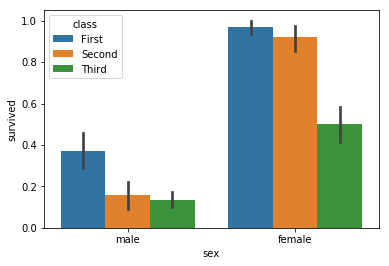

In [16]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

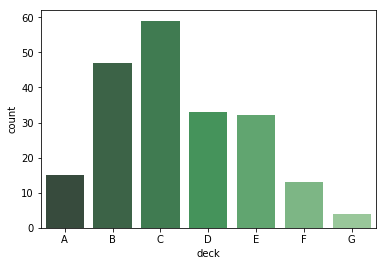

In [17]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");  # show the number of observations

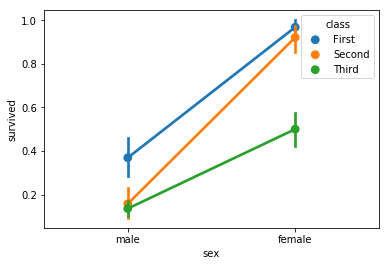

In [18]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

### Drawing multi-panel categorical plots

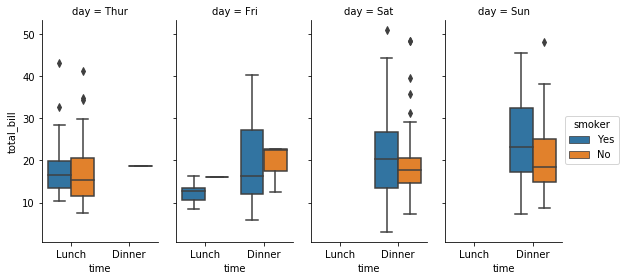

In [19]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

For more general handling of a large number of plots with multiple Axes where each Axes shows the same relationship conditioned on different levels of some variable, use `FacetGrid`. It’s possible to condition on up to three variables by assigning variables to the rows and columns of the grid and using different colors for the plot elements.